# Training of model for Speech Command Recognition

Load the quanvolved data. Enter the directory that you used for quanvolution

In [3]:
import numpy as np

q_train_images = np.load("/content/drive/MyDrive/Quanvolved Data/Log Power Mel Deployment/q_train_images_power_mel_dep.npy")
q_test_images = np.load("/content/drive/MyDrive/Quanvolved Data/Log Power Mel Deployment/q_test_images_power_mel_dep.npy")
q_val_images = np.load("/content/drive/MyDrive/Quanvolved Data/Log Power Mel Deployment/q_val_images_power_mel_dep.npy")

train_labels = np.load("/content/drive/MyDrive/Quanvolved Data/Log Power Mel Deployment/train_labels_power_mel_dep.npy")
test_labels = np.load("/content/drive/MyDrive/Quanvolved Data/Log Power Mel Deployment/test_labels_power_mel_dep.npy")
val_labels = np.load("/content/drive/MyDrive/Quanvolved Data/Log Power Mel Deployment/val_labels_power_mel_dep.npy")

Run the below cell for the 2x2 model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

def ClassificationModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(16, 16, 12)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
  return model

Run the below cell for 3x3 model. Here the input shape is 33x33x3 because it gives errors with 11x11x27 shape. This is most probably because 27 is greater than 11, and it doesn't like an input shape axbxc where c is greater than a or b. For this, we reshape the quanvolved images later into 33x33x3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

def ClassificationModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(33, 33, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
  return model

The below cell flattens the labels or commands arrays to make it compatible for training

In [5]:
import numpy as np

train_labels = train_labels.flatten()
test_labels = test_labels.flatten()
val_labels = val_labels.flatten()

Only run the below cell if you're using 3x3 quanvolution data. This reshapes the arrays to 33x33x3 size

In [ ]:
import tensorflow as tf

shape = q_val_images.shape
q_val_images = tf.reshape(q_val_images, (shape[0], 33, 33, 3))

shape = q_test_images.shape
q_test_images = tf.reshape(q_test_images, (shape[0], 33, 33, 3))

shape = q_train_images.shape
q_train_images = tf.reshape(q_train_images, (shape[0], 33, 33, 3))

Model Structure

In [9]:
model = ClassificationModel()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        3488      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 64)               

Training the Model

In [10]:
history = model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_val_images, val_labels),
    batch_size=32,
    epochs=20,
    verbose=2,
)

Epoch 1/20
466/466 - 11s - loss: 1.2516 - accuracy: 0.5542 - val_loss: 0.8453 - val_accuracy: 0.6992 - 11s/epoch - 24ms/step
Epoch 2/20
466/466 - 7s - loss: 0.6438 - accuracy: 0.7751 - val_loss: 0.5909 - val_accuracy: 0.7935 - 7s/epoch - 15ms/step
Epoch 3/20
466/466 - 9s - loss: 0.4683 - accuracy: 0.8371 - val_loss: 0.5229 - val_accuracy: 0.8130 - 9s/epoch - 20ms/step
Epoch 4/20
466/466 - 8s - loss: 0.3874 - accuracy: 0.8637 - val_loss: 0.4471 - val_accuracy: 0.8489 - 8s/epoch - 18ms/step
Epoch 5/20
466/466 - 9s - loss: 0.3278 - accuracy: 0.8858 - val_loss: 0.4474 - val_accuracy: 0.8499 - 9s/epoch - 19ms/step
Epoch 6/20
466/466 - 9s - loss: 0.2738 - accuracy: 0.9043 - val_loss: 0.3936 - val_accuracy: 0.8698 - 9s/epoch - 20ms/step
Epoch 7/20
466/466 - 7s - loss: 0.2430 - accuracy: 0.9146 - val_loss: 0.3651 - val_accuracy: 0.8818 - 7s/epoch - 15ms/step
Epoch 8/20
466/466 - 10s - loss: 0.2081 - accuracy: 0.9261 - val_loss: 0.3842 - val_accuracy: 0.8792 - 10s/epoch - 22ms/step
Epoch 9/20
4

Save the Model

In [11]:
model.save('/content/model_dep.h5')

Loss Plot

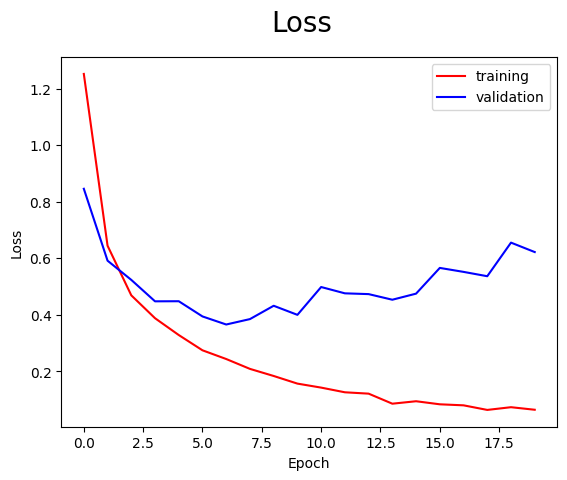

In [23]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='training')
plt.plot(history.history['val_loss'], color='blue', label='validation')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Accuracy Plot

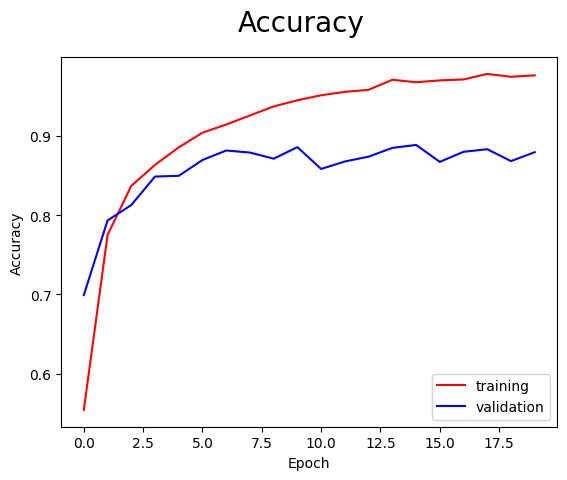

In [24]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(history.history['accuracy'], color='red', label='training')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

FLOP Count for Model. For this, we use a package called keras-flops (https://pypi.org/project/keras-flops/)

In [18]:
from keras_flops import get_flops

flops = get_flops(model, batch_size=32)
print(f"FLOPS: {flops}")

FLOPS: 95034880


Testing with test split of dataset

In [ ]:
import numpy as np

# Computing the predictions, which are in form of arrays
y_true = []
y_pred = []
for i in range(len(test_labels)):
  y_true.append(test_labels[i])
  y_pred.append(model.predict(np.expand_dims(q_test_images[i], 0)))

# Taking the max of the arrays to get one prediction per input
yhat = []
for pred in y_pred:
  yhat.append(np.argmax(pred))

Classification Report (including testing accuracy)

In [20]:
from sklearn.metrics import classification_report

# Directories listed in alphabetical order as the labels are in the form of numbers right now
directories = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

print(classification_report(y_true, yhat, digits=4, target_names=directories))

              precision    recall  f1-score   support

        down     0.8636    0.8814    0.8724       194
          go     0.8479    0.8762    0.8618       210
        left     0.9302    0.8734    0.9009       229
          no     0.8216    0.8294    0.8255       211
         off     0.8989    0.8247    0.8602       194
          on     0.8652    0.9706    0.9149       238
       right     0.9352    0.9352    0.9352       216
        stop     0.9000    0.9119    0.9059       227
          up     0.8856    0.8318    0.8578       214
         yes     0.9282    0.9194    0.9238       211

    accuracy                         0.8871      2144
   macro avg     0.8876    0.8854    0.8858      2144
weighted avg     0.8880    0.8871    0.8869      2144



Sparse Categorical Cross-Entropy

In [21]:
import tensorflow as tf

scce = tf.keras.losses.SparseCategoricalCrossentropy()
print(scce(y_true, y_pred).numpy())

0.5441653
